In [1]:
from collections import defaultdict
from IPython.display import Image
from matplotlib import pyplot as plt
import numpy as np
from numpy.polynomial.hermite import Hermite
from numpy.polynomial.legendre import Legendre
#from numpy.polynomial. import 
import os
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
PATH_TRAIN = '/home/jpeacock29/TeamDarWin-darwin-cluster/Random_sampler_of_images/labeled_samples.csv'
PATH_TRAIN_CSV = '/data/amnh/darwin/samples/image_csvs/'
PATH_ALL_CSV = '/data/amnh/darwin/image_csvs_clean/'

# Fit polynomial 

In [15]:
def plot_example_fit(_i, _polynomial_type, _degree):
    
    for i, edge_file_name in enumerate(os.listdir(PATH_ALL_CSV)):

        if i == _i:
            example_edge = pd.read_csv(PATH_ALL_CSV + edge_file_name, names=['x', 'y'])
            x = example_edge.x.values
            y = example_edge.y.values
            y_fit, sse = polynomial_fit(x, y, _polynomial_type, _degree)
            
            plt.plot(x, y)
            plt.plot(x, y_fit)
            
            plt.show()
            
            print(sse)
            print(edge_file_name)
            print(y_fit[0:10])
            
            break

In [20]:
def polynomial_fit(x, y, polynomial_type, degree):
    """Fit x and y coordinates with polynomial_type of degree."""
    
    # fit the x and y data, returing a new polynomial object and a report on the fit
    fit_polynomial, fit_report = polynomial_type.fit(x, y, degree, full=True)
    
    # predict y values using the fit coefficients
    y_fit = fit_polynomial(x)
    
    # extract sse from list of additonal attributes
    sum_squared_errors = fit_report[0]
    
    return y_fit, sum_squared_errors

In [6]:
def median_SSE_vs_polynomial_degree(path, _polynomial_type, max_degree):

    polynomial_degree__SSEs = defaultdict(list)
    
    for i, edge_file_name in enumerate(os.listdir(path)):
        
        # load edge
        example_edge = pd.read_csv(path + edge_file_name, names=['x', 'y'])
        x = example_edge.x.values
        y = example_edge.y.values
            
        for _degree in range(15):
        
            y_fit, sse = polynomial_fit(x, y, _polynomial_type, _degree)
            
            polynomial_degree__SSEs[_degree].append(sse)
    
    return polynomial_degree__SSEs

In [7]:
def plot_median_SSE_vs_polynomial_degree(_polynomial_degree__SSEs):
   
    plt.semilogy()
    bp = plt.boxplot(list(_polynomial_degree__SSEs.values()))
    
    plt.setp(bp['whiskers'], color='black', linestyle = 'solid')
    plt.setp(bp['fliers'], alpha = 0.5, marker= 'o', markersize = 3)
    
    plt.xlabel('Polynomial degree')
    plt.ylabel('Median SSE')

# Compare Hermite and Legendre polynomial fits 

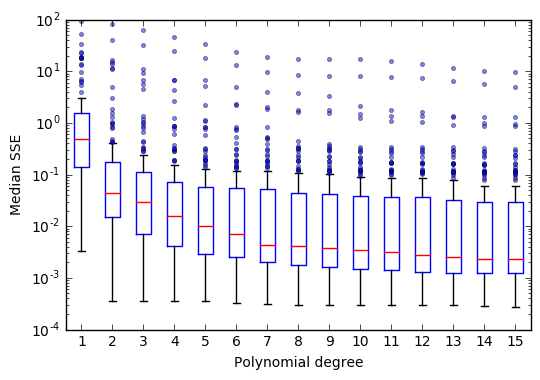

In [8]:
plot_median_SSE_vs_polynomial_degree(median_SSE_vs_polynomial_degree(PATH_TRAIN_CSV, Hermite, 15))

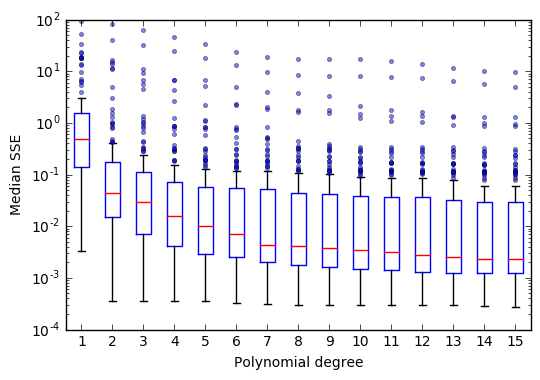

In [9]:
plot_median_SSE_vs_polynomial_degree(median_SSE_vs_polynomial_degree(PATH_TRAIN_CSV, Legendre, 15))

As far we can tell these results are basically identical! We check some example values and they're are still identical. Perhaps Legendre and Hermite are simply different representations of the same polynomials?

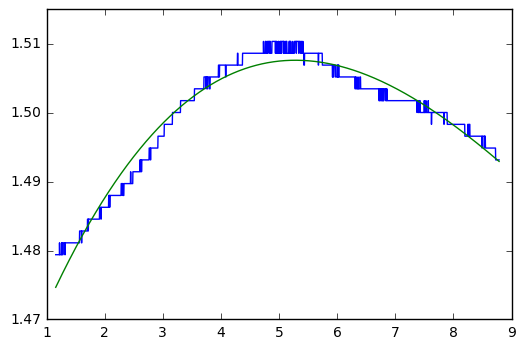

[ 0.01196983]
MS-DAR-00017-00001-000-00195_south.csv
[ 1.47466573  1.47469608  1.47472641  1.47475672  1.47478701  1.47481729
  1.47484755  1.4748778   1.47490803  1.47493824]
[  1.49563999e+00   5.92155274e-03  -5.91775589e-03   6.76089686e-04]


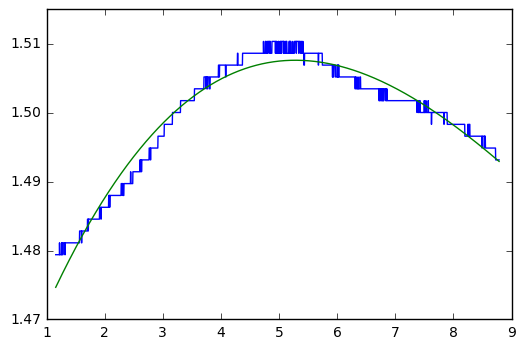

[ 0.01196983]
MS-DAR-00017-00001-000-00195_south.csv
[ 1.47466573  1.47469608  1.47472641  1.47475672  1.47478701  1.47481729
  1.47484755  1.4748778   1.47490803  1.47493824]
[ 1.49958516  0.00697526 -0.01578068  0.00216349]


In [21]:
plot_example_fit(10, Hermite, 3)
plot_example_fit(10, Legendre, 3)

# Classifying edges?

In [11]:
edge_train = pd.read_csv(PATH_TRAIN)

In [12]:
edge_train.head(3)

,filename,has_north_edge,has_south_edge,north_type,south_type,fullpage,text,notes,color
0,MS-DAR-00209-00015-000-00113.jpg,True,True,fuzzy,straight,0,1.0,NaN,NaN
1,MS-DAR-00209-00015-000-00031.jpg,True,True,curvy,straight,0,0.5,vertical edges are curvy,NaN
2,MS-DAR-00209-00014-000-00285.jpg,True,True,straight,fuzzy,0,1.0,NaN,NaN


In [13]:
edge_train.has_north_edge.mean(), edge_train.has_south_edge.mean()

(0.76000000000000001, 0.76000000000000001)

In [14]:
Image(filename='/data/amnh/darwin/segmentations/MS-DAR-00058-00001-000-00035_largest_component.png');